<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2023 OBSERVING EXERCISE I</h2>
<h4>Due by October 4th at noon.</h4>

<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.</i>  

As a key element in this class, we are planning to observe remotely with the 0.7m Breyo Observatory at Siena College in the vicinity of Albany, NY. The telescope is equipped with a CCD camera and a variety of broad band filters. The broad-band filters include the standard Sloan Digital Sky Survey *ugriz* set. The plan is to use the scope potentially (weather permitting) to obtain photometry of an open cluster.

All your answers should be entered using the python notebook templates provided as part of this assignment. Each student will need to hand in their own notebook by uploading it to GitHub.   Just make a repository called `Observing Exercise Part 1` and send me the link.  You don't need to make me a collaborator.

In the code places where you will need to put something or write your own code are specified by `#***************`

<h3>Part 1</h3>
To plan your observing, you need to derive a few basics about the combined scope/ instrumentation. The <a href = "https://planewave.com/product/cdk700-0-7m-cdk-telescope-system/">0.7m Breyo telescope</a> at Siena has an optics combination that results in an effective f/6.5 ratio. It is equipped with an electronically cooled <a href = "https://www.flicamera.com/kepler/kepler.html">  Kepler KL4040 camera</a> and a filter wheel assembly from Finger Lakes Instrumentation.  

The KL4040 camera has the GS4040 sCMOS detector described at the bottom of the CCD page.  Note that "4k" in astronomy language means 4096.

<b><u>A)    Given the CCD type and the telescope optics: (5 points)
<ol> 
    <li>What will be the size in arcseconds of the typical CCD pixel on the KL4040 chip.</li>
    <li>What is the field of view (FOV) of the 0.7m CMOS camera in arc minutes? By FOV I mean the length of one side of the detector. </li>
<ol>
</u></b>
    

   

In [26]:
#Answer A) Here
#You will need to use simple mathematical expressions and what you learned in class to find the asnwers to these.  
#In order to get credit for this part you will need to write an expression that properly executes and results in the answer
#You will need an expression for both parts 1 and 2 above

#******************
#part 1
pixelSize = ((9*10**-6)*206265)/(4540*10**-3) #m/pixel * arcsec / m = arcsec/pixel
print(pixelSize)

#part 2
fov=(pixelSize*4096)/(60) #arcsec/pixel * pixel /(arcsec/arcmin)= arcmin
print(fov)

0.4088953744493392
27.91392422907489


We are using the telescope from Oct. 5-19 depending on the weather. We will need to begin the telescope setup procedure about 1 hour before Sunset so that we are ready to begin taking frames once it becomes dark enough to observe and we can take some calibration frames while the sky is still bright enough. (Note: since we are observing from near Albany, NY, all the questions below need to be answered as if you were in Albany. We can then subtract 1 hour from the times to account for the local observing schedule.) 

<b><u>B)    When does sunset occur on Oct. 10? (5 points)</u></b>  <i> The end of the code prints your answer in UTC. You need to also print it in Albany and Lawrence time.</i>

In [16]:
#There is a function in the python package astroplan to find the sunset time for a given location and date:
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.sun_set_time
#This function is a part of the observer class, and takes an input Time object from astropy corresponding to 
# the date. See documentation for astropy's Time object here for reference if needed:
#    https://docs.astropy.org/en/stable/api/astropy.time.Time.html
#Here's an example of how this function works:
#
#    Time_date = Time('2001-05-27')
#    observer_object = Observer(longtiude = -155.0903*u.deg, latitude = 19.7026*u.deg, elevation = 100.0*u.m, name = "Subaru",timezone = "US/Hawaii")
#    sunset_time = observer_object.sun_set_time(Time_date, which = "next")
#
#Note here that Time_date is the date of observation, and which="next" instructs the function to provide the next sunset time
#For details on the observer object, to be used throughout this assignment, see here:
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html
#In general, the observer object takes in a longtiude, latitude, elevation (we assign this as 0), a name of your choice, and a timezone.
#You can view a list of available timezones on this stackoverflow thread:
#    https://stackoverflow.com/questions/13866926/is-there-a-list-of-pytz-timezones


#We import the necessary packages for this section
from astroplan import Observer
from astropy.time import Time
import astropy.units as u
#import warnings
#warnings.filterwarnings("ignore")

#****************
#Here you will need to define the coordinates of the Breyo observatory. Note that W and S have negative values (whereas E and N are positive).
#The latitude and longitude need to be put in decimal form, e.g. long = 20.0003, lat = 33.33333 (those are not the right coordinates)
_LONGITUDE_ =  -73.7513#*******************
_LATITUDE_ =   42.7189#*******************

#This is an astropy Time object, with a time value that corresponds to the date of observation. Date format: Time('YYYY-MM-DD')
_TIME_ = Time('2023-10-10') #*******************


#You now need to make the observer object for the Breyo observatory. See the example above for help
Breyo_observer = Observer(longitude = _LONGITUDE_*u.deg, latitude = _LATITUDE_*u.deg, elevation = 43.0*u.m, name = "Breyo",timezone = "US/Eastern") 

#This computes the sunset at the time specified by the TIME object, at the location defined by Breyo_observer
sunset_time = Breyo_observer.sun_set_time(_TIME_, which = "next") 

#The following provides a useful way to print out astropy Time objects in a convenient way. 
#The time returned here is in UTC time
print("Sunset: {0.iso}".format(sunset_time)) 
print("Sunset time at Breyo: {0.iso}".format(sunset_time-(1/6)+(4.9948/1440)))
print("Sunset time in Lawrence: {0.iso}".format(sunset_time-(5/24)+(20.9412/1440)))
#*****************
#put calculation here to find sunset time at Breyo and in Lawrence.  Also include code to print answers.

Sunset: 2023-10-10 22:16:35.954
Sunset time at Breyo: 2023-10-10 18:21:35.642
Sunset time in Lawrence: 2023-10-10 17:37:32.426


Note – technically, sunset refers to the moment when the entire disk of the sun sinks below the horizon. However, the sky is still quite bright because of scattered/refracted light from the seeing sun. The next key moment is the end of twilight, defined as the moment when the sun’s center is a certain number of degrees below the horizon: civil twilight = 6°, astronomical twilight = 18°. At astronomical twilight, it should be totally dark (Moon excluded).

<b><u>C)    When does <font color="red">astronomical twilight</font> occur on Oct. 10? (5 points)</u></b>

In [8]:
#There is an astroplan function that can be used to find astronomical twilight for a given time and position(observer):
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.twilight_evening_astronomical
#This function is a part of the observer class in astroplan, and its inputs are a time object corresponding to
#the date of observation, and an argument which, with possible values previous, nearest, or next, which choose
#the corresponding astronomical twilight to find
#Example:
#    observer_object = Observer(location=location, name="Subaru", timezone="US/Hawaii")
#    astro_twilight = observer_object.twilight_evening_astronomical(Time_date, which = "next")

###
#*******************
#Answer C) Here. YOUR CODE: 
astro_twilight = Breyo_observer.twilight_evening_astronomical(_TIME_, which = "next")

#The following provides a useful way to print out astropy Time objects in a convenient way. 
print("Astronomical Twilight UTC: {0.iso}".format(astro_twilight)) 


Astronomical Twilight UTC: 2023-10-10 23:54:51.481


Convert the UTC output to the local time both at the Breyo Observatory and in Lawrence and put the answer and the calculation in the next cell. The result of the cell should print out the twilight time at both locations.

In [17]:
#Part C answer goes here
#*******************

#Lawrence time
print("Astronomical Twilight in Lawrence: {0.iso}".format(astro_twilight-(5/24)+(20.9412/1440))) 
#Breyo time
print("Astronomical Twilight at Breyo: {0.iso}".format(astro_twilight-(1/6)+(4.9948/1440))) 

Astronomical Twilight in Lawrence: 2023-10-10 19:15:47.953
Astronomical Twilight at Breyo: 2023-10-10 19:59:51.169


We will be observing for the first half of the night. Given your answer to (C), we will divide the evening into two time slots, each 1.5 HRS long. Let AT = Astronomical Twilight, then the 2 slots are:
<ol>
    <li> <b>time slot 1</b> = AT + 0.0 HR to AT + 1.5 HRS</li>
    <li> <b>time slot 2</b> = AT + 1.5 HRS to AT+ 3.0 HRS</li>
</ol>
A link to the names of everyone and their time slots were posted on Blackboard under Observing Schedule and also <a href="https://docs.google.com/spreadsheets/d/1GPnIj0NZr8MZxJ8iR5KuD8TUVqdz0gaZHx1QOlnwjl4/edit?usp=sharing">here</a> . You should work within your group to prepare the observing materials discussed below, but everyone will need to hand in their own notebook.

For your group/time slot (assume we observe on Oct. 10th as the times won't very significantly over our observing window):

<b><u>D) What is the optimum range of RA for objects that you would ideally observe during your 1.5-hour session? (5 points)</u></b> Note: <i>Think about whether objects of a given RA are rising or settng at the beginning and end of your observation session.</i>

Go to the web page https://aa.usno.navy.mil/data/siderealtime to find the sidereal time at different local times.  

Enter the information in the empty markdown box below and make sure to give a rationale as to why this range of RA is appropriate.

*Answer for D goes here:*
The optimum range of RA for objects during the 1.5 hour session is about the local sidereal time plus/minus 1.5 hour, as the objects will move across the sky in that 1.5 hour period. So, this means 20 hours and 17 minutes plus/minus 1.5 hr -> 18 hours and 47 minutes to 21 hours and 47 minutes.

<b>E) If you want to remain within 30° of the zenith, what is the optimum range in declination? You need to answer this in two parts: (5 points)</b> 

1. <b>Given the location of the observatory, objects at their transit need to have what range of declination to be within 30° of the zenith.</b><i> This requires a straightforward calculation</i>
        


In [18]:
#Answer E.1) Here
#*******************
#Part 1:
#   Figure out how to use the observatory's location to find the position of the zenith.
#
decMax=42.7189 + 30 #zenith is just your latitude, so plus/minus 30 degrees will give you the declination range.
decMin=42.7189 - 30

2. <b>Using airmass plots (see below), determine what range of declinations would keep objects within 30° of the zenith over the course of your 1.5 hour observation block. Your answer will need to include airmass plots to demonstrate this. These plots can contain multiple curves, e.g. for different RA and DEC combinations, as long as the curves are labeled. All plots should come with a caption.</b>


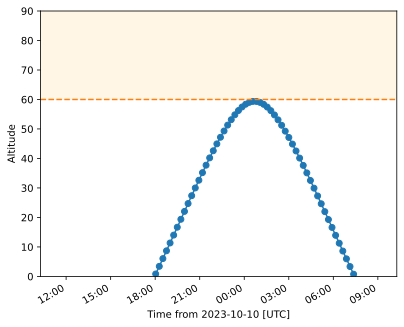

In [21]:
#Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=315.78*u.deg, dec=12*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitud315.78e(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()


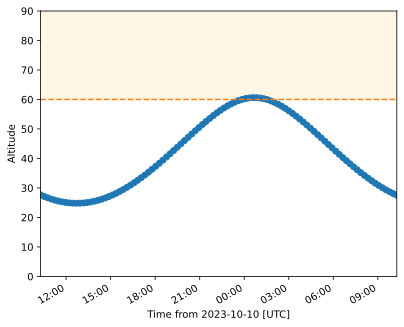

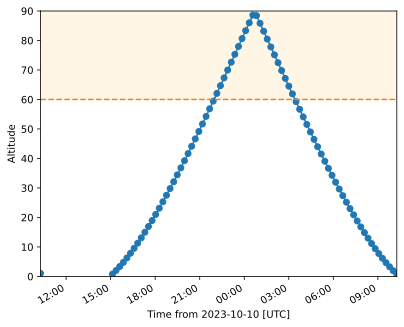

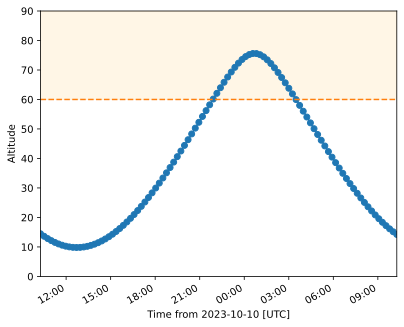

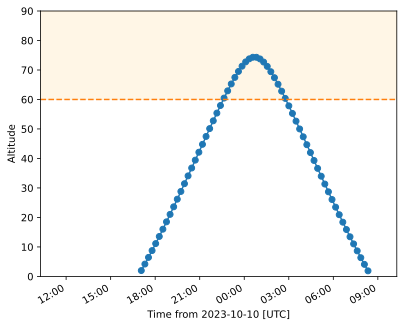

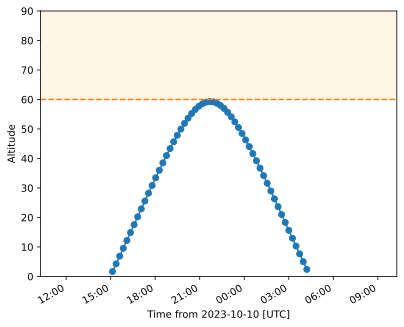

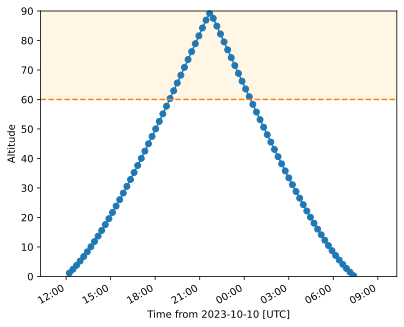

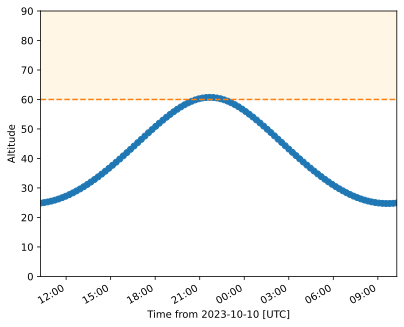

In [24]:
#*******************
#Answer E.2) Here

#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
#
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=315.78*u.deg, dec=72*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()

%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=315.78*u.deg, dec=42*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=315.78*u.deg, dec=57*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=315.78*u.deg, dec=27*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=270.78*u.deg, dec=12*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=270.78*u.deg, dec=42*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2023-10-10 22:16:35.954') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra=270.78*u.deg, dec=72*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()

<h3>Part 2</h3>
<h4></h4>
<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.  However, you need to read <b>all the text carefully</b> as you will otherwise miss important elements.</i> 

The assignment is due Wednesday October 6 at noon.

In [25]:
#***Run this block but DO NOT CHANGE***

#Nothing to do here. Just some things defined for use later. 
from astroplan.plots import plot_finder_image
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
import astropy.units as u
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' #This is here to make the plots appear high-resolution

def get_RA_deg(RA_HMS):
    #Convert RA from HMS to decimal degrees
    H, M, S = [float(i) for i in RA_HMS.split()]
    rs = 1
    if str(H)[0] == '-': 
      rs, H = -1, abs(H)
    deg = (H*15) + (M/4) + (S/240)
    RA = '{0}'.format(deg*rs)
    return float(RA)
    
def get_DEC_deg(DEC_DMS):
    #Convert DEC from DMS to decimal degrees
    ds = 1
    D, M, S = [float(i) for i in DEC_DMS.split()]
    if str(D)[0] == '-':
      ds, D = -1, abs(D)
    deg = D + (M/60) + (S/3600)
    DEC = '{0}'.format(deg*ds)
    return float(DEC)

**Spreadsheet contents (10 points)**

<p>Given your window of opportunity, first identify all open clusters that meet your time criteria from Part 1 (there will be lots of options since we are merely selecting an area of the sky as out first cut).
    
You will be using the “WEBDA” database at https://webda.physics.muni.cz/ .  This is an online database of stellar clusters that is a compiled version of clusters and lots of the data that is available for them.  

<b>1) Read the "Description" page at https://webda.physics.muni.cz/description.html </b>

You can access data in the following way.  From the main page go to the following link: Navigation→Available Data and Parameters.   This brings you a query tool that you can use to request clusters in a range of coordinates, with a minimum number of stars, and with a certain type of available data.  The Available Data and Parameters link is in the top right of the Navigation page under “Interrogation.”

To start with query the clusters using the following criteria:
<ol>
    <li>The range of RA and DEC that you determined in PART 1 for your observing block</li>
<li>A minimum number of stars that you will need to get a proper color-magnitude diagram.  Start with 100 and based on your work below, change this value to a higher or lower value depending on what you think you need to get a good CMD.</li>
<li>For the dropdown menu by “datatype” choose “UBV CCD observations”.  That will only choose clusters that have existing observations that we can use to calibrate our data.</li>
</ol>
This query will result in many clusters.  You will need to pick your targets using the following criteria.  This will involve clicking through the clusters individually to find a good one.  My suggestion is to build up a sample of clusters using the main query and then keeping a table, perhaps on a google sheet or excel sheet.  Then you can keep track of the answers to the different questions below so that you can pare down your list. </p>  

<b><i>You should upload your final table or spreadsheet to GitHub as part of this assigment.  The version of the table/spreadsheet that you upload to GitHub doesn't need to contain every cluster you looked at.  It just needs to give the ~6 objects that you have at the end of #3 below and comments for each cluster about each of the remaining questions.  It must contain a clear indication of which clusters comprise your final sample.  It should also have any important notes about each cluster that led you to choose it.</b></i>

<b>2)   How big in angular size is the cluster?</b> 
<p>
If the cluster is too large, you may not be able to observe most of it within the FOV of the camera, meaning that you won’t be able to get your observations completed without doing multiple, overlapping fields.  You can determine this a variety of ways.  If there is an image of the cluster on the main page, with a size scale, you can compare this to the FOV of the instrument that you computed in Part 1.  You can also use the <u>“From cluster chart (plotted)”</u> link under Query.
</p>

<b>3)   How sparsely (densely) populated is the cluster field?</b>
<p>If the cluster is composed of a handful of stars against a rich background field, the dominant majority of what you observe may not be in the cluster and identifying the cluster members may be an exercise in self-delusion. If the cluster is exceptionally rich/crowded, you may have a challenging time getting good photometry because the stellar images overlap. This is a common problem with globular clusters, which contain hundreds of thousands of stars, but it can also affect open clusters if they are too distant, thereby squeezing a large sample of stars into a small angular diameter.   Again, you can get this through either the image or the finder chart.</p>

************************************
<p>At this point, you want to have an observing list of ~6 potential clusters. For the next set of constraints, <i>you need to determine how much we already know about each cluster on your list from already available observations.</i></p>

<b>4)   Does CCD photometry already exist that would give you some insight into the expected color-magnitude diagram (CMD) for the cluster, once your photometry is completed? </b>

While we will be observing with *g* and *r* filters, which have significantly different response curves than *UBV* filters, it is still useful to see what kind of CMD the clusters have using existing observations.

<b>5)   If a CMD exists for the cluster, does it look like a scatter plot or is there a respectable locus of points that probably includes the cluster members? </b>


<b>6)   How bright are the stars in the cluster with the brightest apparent magnitude? </b> 
<p>Brighter stars require shorter exposures but, if stars are too bright, they will quickly saturate the CCD chip in the region of the star and possibly affect fainter stars nearby. Note that this answer is sometimes coupled to the answer to tha angular size of the stars discussed in (2) since nearby clusters have stars with bright apparent magnitudes (= small distance modulus). </p>

<b>7)   How faint are the faintest stars you wish to observe?</b>

<p>This requires a bit more work because you want to look at the color-magnitude diagram of the cluster to get some sense of how faint you need to observe to get a decent chunk of the CMD.  Assume that in a given band you don’t want to have to expose for longer than 15 minutes in total and that you want to get photometry in the *g* and *r* bands.  You also want a signal-to-noise (SNR) of at least 15 for your faintest stars.  To calculate the faintest star that you can observe in 15 minutes at an SNR=15 you need to do a computation. 
    
Because the camera is new, we don't know how many counts we get for a star of a certain brightness in the *g* and *r* filters.  Instead, we know from previous experience what these numbers are for the *B* and *V* filters, though these filters are not mounted on the telescope at the current time.  We will therefore do the compuation for the *B* and *V* filters and assume that the answers are similar as for the *g* and *r* filters.  In practice, this is not a perfect assumption, but it serves our purpose here and the *B* and *V* magnitudes we compute will be within 0.3 to 0.5 mag of the *g* and *r* mag.

For our detector and telescope a star of 20th magnitude in B and V gets 889 and 953 photons respectively in a 100s exposure.  The star’s light is spread over 10 pixels.  Let us conservatively (because the brightness is high then) assume that we are observing 1 day from full moon.  In that case the background per pixel is 194.2 and 144.8 in the B and V band respectively in a 100 sec. exposure.  Every pixel in our detector has a random signal (or noise) that is introduced whenever the signal is read out from the detector.  This "readnoise" is 3.7 counts per pixel.  Describe in a text cell below your computational cell whether or not you can neglect the read noise when determining the signal to noise, and why?
    
From the numbers above you can calculate the the faintest magnitude that yields you a SNR=20 in 15 minutes.

<b>(10 points) Your code should print out the following, with explanatory text.  There should be separate values given for B and V.  Each part is worth 3 points:
    <li>a) total number of background counts in B and V in 15min for the 10 pixels in an object aperture;
    <li>b) the noise from the background in 15min for the summed pixels in an object aperture;
    <li>c) the number of counts in 15min for B and V that correspond to the desired SNR=20;
    <li>d) the number of counts in B and V for a 20th magnitude star in 15min;
    <li>e) the magnitude in B and V corresponding to the limiting number of counts in c).
</b>

For this calculation, assume the gain is 1.  This means that if I get one photon, my CCD counts 1 electron.  Since Poisson noise is computed on the incident photons and not the number of measured electrons, you need to convert your counts to photons.  We will assume for now that this is a 1-to-1 conversion (Gain=1).  This is not correct but will be ok for this calculation.

In [8]:
import math
#Answer 8) Here
#YOUR CODE GOES HERE

#Hint: You need to use the information about the number of counts 
#for different sources that I give above.

#In each band, think about the noise from the background over the 
#whole size of the source when observed in 15min.  From this and the 
#SNR requirement you can determine the number of object counts that you need 
#to have the required SNR (see lecture notes).  Finally, the flux from a 
#20th mag object can then be used to convert that number of counts to a 
#limiting magnitude.

#first measure the total background expected in 15 minutes
bCount = 194.2*9*10
vCount = 144.8*9*10
print("a) The number of BKG counts in B and V in 15min is: ", bCount,'and', vCount)
bNoise = (1/math.sqrt(bCount))
vNoise = (1/math.sqrt(vCount))
print("b) BKG noise in B and V: ", bNoise, 'and', vNoise)
bLimit = (20**2+math.sqrt(20**4+4*20**2*bCount))/2
vLimit = (20**2+math.sqrt(20**4+4*20**2*vCount))/2
#now determine the number of object counts needed in 15 minutes to get the desired SNR.  
print("c) limiting counts for SNR limit in B and V: ", bLimit, 'and', vLimit)
bCountObject = 889*9
vCountObject = 953*9
print("d) the number of counts in B and V for a 20th mag object in 15min: ", bCountObject, 'and', vCountObject)
bMagLim =-2.5*math.log10(bLimit/bCountObject)+20
vMagLim =-2.5*math.log10(vLimit/vCountObject)+20
print("e) magnitude limits in B and V corresponding to our SNR limit: ", bMagLim, 'and', vMagLim)
#You can disregard the readnoise because the count per pixel is so much lower than the other counts, making it negligible.

a) The number of BKG counts in B and V in 15min is:  17478.0 and 13032.0
b) BKG noise in B and V:  0.007564045498294097 and 0.008759805520460611
c) limiting counts for SNR limit in B and V:  2851.6410013423765 and 2491.898776124286
d) the number of counts in B and V for a 20th mag object in 15min:  8001 and 8577
e) magnitude limits in B and V corresponding to our SNR limit:  21.12012354992349 and 21.342012533219396


Now decide whether your clusters have enough stars above this limit to be able to construct an adequate CMD.

<i>Note that you you don’t need to go as faint as possible.  You need to make a decision based on the characteristics of the cluster CMD.  For example, at the calculated magnitude limit are you just picking up the cluster giant branch or are you getting some fraction of the turnoff and main sequence?   You want a cluster such that your magnitude limit allows you to go deep enough to learn something about the cluster.</i></p>

--------------------------
<i> By this point you should have enough information to pick 2-3 clusters that you might want to observe given all of the conditions above.  Below you will make some plots for each of these clusters.  </i>



<p> We will now provide you with a way to make CMDs and a histogram of the V-band magnitudes. To do this, you will need to click the "Available Data" link on the wbeda interface, and then click the "UBV CCD" link. This should bring you to a table of values with 5 columns: No, Ref, V, B-V, and U-B. <b>Copy and paste this entire table (inlcuding the columns names) into a text editor of your choice, and save it as a text file. You can then use the make_plots() function (defined below), by passing in as input the string of your file name (ex: "cluster.txt").</b> Please note that you need to use the cell block below the block of code directly below this text cell where the function is defined (if you try to call make_plots() before the cell it is written in you will get an error). You also need to make sure that the file with the data (there will be different ones for each cluster) is in the same directory as where the notebook is.  This isn't a generic requirement of such codes, but what we are doing here.</p>

In [2]:
#***RUN THIS BLOCK. If you wish to change the font sizes in the plots, you can do so here.  ***
import matplotlib
#Now we just define some settings for our plots. 
####FIX IMPLEMENTED####
params = {
    #'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray', #gray
    'axes.grid': False,
    'savefig.dpi': 300,  
    'axes.labelsize': 14, # fontsize for x and y labels
    'axes.titlesize': 20, 
    'font.size': 14, 
    'legend.fontsize': 10, 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12, 
    'text.usetex': False,
    'figure.figsize': [6, 6], #[width, height]
    'figure.autolayout': False,
    'font.family': 'monospace',
}
matplotlib.rcParams.update(params) #activate the settings

def make_plots(file_name):
    print("********************************************")
    print("Plots for file: "+file_name)
    print("********************************************")
    #We load in the first 4 columns of the file
    data = np.loadtxt(file_name,skiprows = 0,usecols = (0,1,2,3), dtype={'names': ('No', 'Ref', 'V', 'B-V'), 'formats': ('S8', 'S16', 'S16','S16')})
    
    #We need to handle duplicates in the file, so we find indeces of unique sources
    indeces_use = []
    len_data = len(data)
    for i in range(1,len_data-1): #Skip first row since it contains columns names.
        if data[i][0] != data[i+1][0]: #Check if the next source is a repeat
            indeces_use.append(i) #If it is not a repeat, it is unique and we record its index.
            
    num_sources = len(indeces_use) #Number of actual unique sources
    
    
    #We will now average over the magnitudes for repeated sources
    V_avg = np.zeros(num_sources)
    BV_avg = np.zeros(num_sources)
    for i in range(num_sources):
        current_index = indeces_use[i] #Keep track of the first index that this source appears at
        num_i = 1 #Keep track of the number of sources with this source name
        V_tot = float(data[current_index][2])
        BV_tot = float(data[current_index][3])
        #While the next source has the same source name
        while current_index < (num_sources - 2) and data[current_index][0] == data[current_index+1][0]:
            current_index += 1 #We go to the next repeat of this source.
            num_i += 1 
            V_tot += float(data[current_index][2]) #Add the next value forn this repeated source to the total mag
            BV_tot += float(data[current_index][3])
        V_avg[i] = V_tot/num_i
        BV_avg[i] = BV_tot/num_i

    #Make the figure for the CMD
    fig1, ax1 = plt.subplots()
    ax1.set_xlabel(r'$B-V\ [mag]$')
    ax1.set_ylabel(r'$V\ [mag]$')
    ax1.grid(which= 'major', linestyle='-', linewidth='0.5', color = 'black', alpha = 0.3)
    ax1.grid(which='minor', linestyle=':', linewidth='0.3', color = 'black', alpha = 0.2)
    ax1.scatter(BV_avg, V_avg, marker = '.', c='k')

    #Create good min and max values for CMD axes, and set axis limits. 
    x_min_plot = np.min(BV_avg)-abs(.1*np.min(BV_avg))
    x_max_plot = 1.1*np.max(BV_avg)
    y_min_plot = np.min(V_avg)-abs(.1*np.min(V_avg))
    y_max_plot = 1.1*np.max(V_avg)
    ax1.set_xlim([float(x_min_plot), float(x_max_plot)])
    ax1.set_ylim([float(y_max_plot), float(y_min_plot)])
    ax1.set_title(r'Color Magnitude Diagram')

    #Make figure for histogram. 
    fig2, ax2 = plt.subplots()
    ax2.hist(V_avg, bins = 'auto',histtype ='step', color = 'k', lw = 1.5)
    ymin_hist, ymax_hist = ax2.get_ylim()
    xmin_hist, xmax_hist = ax2.get_xlim()
    #Write on the number of total sources for reference
    ax2.annotate( 'N = '+str(num_sources), xy = ( xmin_hist + 0.05*(xmax_hist-xmin_hist), ymax_hist - 0.1*ymax_hist))
    ax2.set_title(r'V mag Histogram')
    ax2.set_xlabel(r'$V\ [mag]$')
    ax2.set_ylabel(r'Counts')

In [3]:
#*****************
#In this block of code you will make a CMD plot and a V-band magnitude histogram.
#You will need to repeat this for each cluster.

#Example call of make_plots for the file "cluster.txt"
#   
#    make_plots("cluster.txt")
#
#Replace "cluster.txt" with the name of your files. You will need to do this for all clusters you use, using a 
#separate text file and call of make_plots for each cluster. 
#YOUR CODE HERE

make_plots("berkeley51.txt")
make_plots("king25.txt")
make_plots("ngc6827.txt")

********************************************
Plots for file: berkeley51.txt
********************************************


NameError: name 'np' is not defined

<b>For each cluster, comment on the characteristics of the two graphs</b>

In [10]:
#***RUN THIS BLOCK***
#This is a routine to pull images from the web at the location of your source and 
#to overlay the Breyo telescope KL4040 camera's field of view

def make_finder(RA_HMS, DEC_DMS, fov, img_width=40/60, img_height=40/60):
    #Use the RA and DEC to make a SkyCoord object, which we use to query and image
    RA_DEG = get_RA_deg(RA_HMS) #convert to Degrees
    DEC_DEG = get_DEC_deg(DEC_DMS)
    source_coord = SkyCoord(ra= RA_DEG*u.deg,dec = DEC_DEG*u.deg)

    #Query an image using astroquery with the given coordinates and image width/height
    xout = SkyView.get_images(source_coord,survey=['DSS'],height=img_height*u.deg,width=img_width*u.deg)
    
    #Make the figure object and handle the fits image appropriately.
    fig, ax = plt.subplots(figsize=(8,8))
    b=xout[0][0]
    ax.imshow(xout[0][0].data,aspect='equal',cmap='gray_r',extent=[b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                               b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                               b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
                                                               b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2']])
    #Overlay a rectangle indicating the fov
    rect = plt.Rectangle((RA_DEG-0.5*(fov),DEC_DEG-0.5*(fov)) ,fov,fov,linewidth=1,fill=False, color='k')
    plt.gca().add_artist(rect)
    ax.set_xlabel(r'RA [DEG]')
    ax.set_ylabel(r'DEC [DEG]')

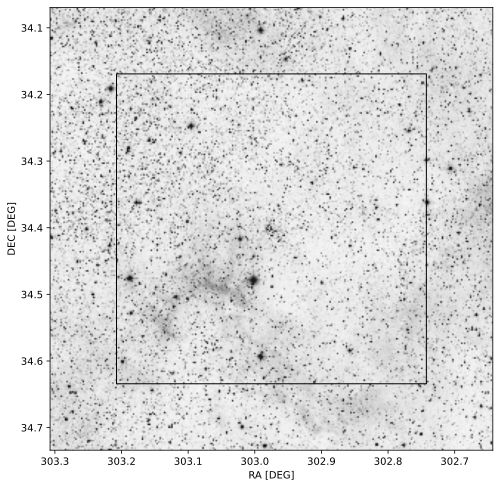

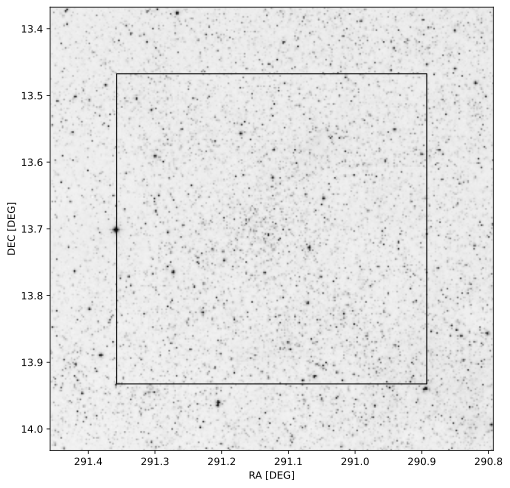

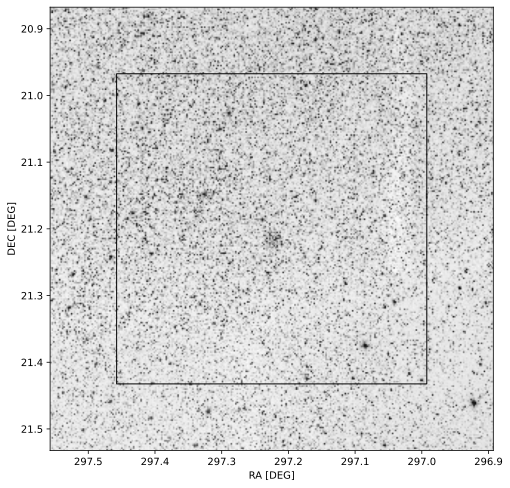

In [13]:
#************
#This block of code allows you to make a finder chart for your cluster using the make_finder() function 
#defined above.
#You will need to do this for each of your three clusters.  
#We provide example code below.

####First, define the RA and DEC of the cluster as follows, in HMS for RA and DMS for DEC
#source_RA = '07 38 46'
#source_DEC = '-33 50 36'
#
####Now, define the fov in arcmin. This should be the fov of your instrument from part 1
#fov = 12.7
#fov_degrees = fov/60
#
#make_finder(source_RA, source_DEC, fov_degrees)
#***********YOUR CODE HERE

source_RA = '20 11 54'
source_DEC = '34 24 06'
fov = 27.9  #in arcmin
fov_degrees = fov/60
make_finder(source_RA,source_DEC,fov_degrees)
source_RA2 = '19 24 30'
source_DEC2 = '13 42 00'
make_finder(source_RA2,source_DEC2,fov_degrees)
source_RA3 = '19 48 54'
source_DEC3 = '21 12 00'
make_finder(source_RA3,source_DEC3,fov_degrees)

<b><p>
(5 points) Your completed version of the Jupyter Notebook template will need to have for each cluster:
<ol>  
    <li>A plot of the RA and DEC of the cluster with an outline of the field of view of the detector centered on the cluster.</li>
    <li>A histogram of the V-band magnitudes of the cluster members</li>
    <li>A color-magnitude diagram of the B-V vs V-band for all the stars in the cluster field.  </li>
</ol>

You will also need to have a block of summary text that describes your choice of clusters.
</p></b>